# Lab 4: Random Forest

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Goal of this lab
- Understand Tree
- Understand RF
- Understand RF feature importance
- A useful protocol in training RF
- use sklearn RF to train a model

## Basics of a tree
Notations: Suppose we have $K$ categories in the classification problem, at the current node, the number of samples with label $j$ is $N_j$. After the split, there are $\alpha_j N_j$ samples that fall into the left node for $j = 1,\ldots, K$.

### What is a node in a tree?
A group of samples with a splitting function

### What are "good" nodes?
Nodes with high purity. High purity roughly means easy to predict.

* Gini impurity: $ \sum_{j=1}^K p_j (1 - p_j)$
* Entropy impurity: $\sum_{j = 1}^K p_j \log \frac{1}{p_j}$.

### Possible splits?
The possible splitting criteria is $1(F_j > t_j)$ where $F_j$ is the $j$-th feature and $t_j$ is the threshold. It is too expensive to use all the features, so during each split, only consider $m_{try}$ features.

### What are good splits?
Split so that the average purity of the two children nodes becomes higher.


[Reference: Breiman's notes](https://link.springer.com/article/10.1023%2FA%3A1018094028462)

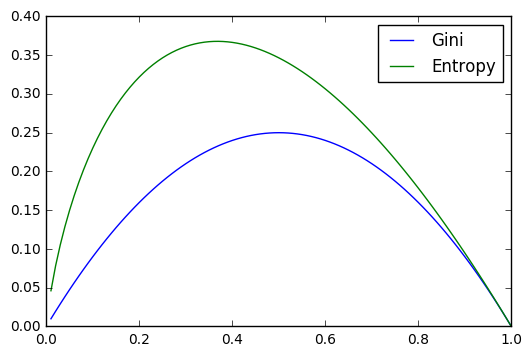

In [2]:
N = 100
x = np.array([(i + 1)/N for i in range(N)])
y1 = x * (1 - x)
y2 = x * log(1/x)
plt.plot(x, y1, x, y2)
legend(['Gini', 'Entropy'])

### Bagging : ensemble of trees
* What is bagging
* out of bag (OOB) error


Refs: [The elements of statistical learning](http://www.springer.com/us/book/9780387848570)

Automatically created module for IPython interactive environment


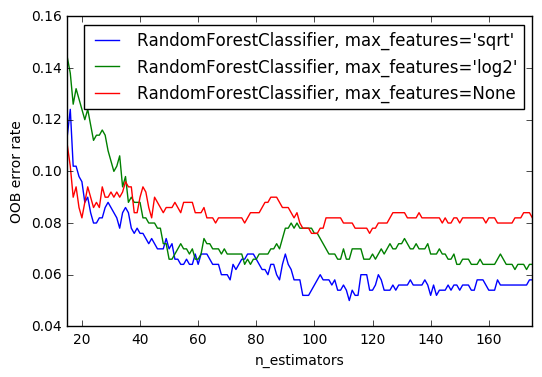

In [3]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)

RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

Downloaded from [sklearn examples](http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html#sphx-glr-auto-examples-ensemble-plot-ensemble-oob-py)

### How to measure a feature's importance in RF?
* mean decrease impurity (MDI)
* mean decrease accuracy (MDA), also known as permutation importance.

Refs:
1. [Understand variable importance in forests of randomized trees](https://papers.nips.cc/paper/4928-understanding-variable-importances-in-forests-of-randomized-trees.pdf)

### A useful protocol to follow when using RF:

1, try different $m_{try}$ and get OOB error as the number of trees grows.

2, Get the best parameter configuration and look into its feature importance scores.

In [4]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X.shape

(569, 30)

/usr/lib64/python3.4/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/lib64/python3.4/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/lib64/python3.4/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/lib64/python3.4/site-packages/sklearn/ensemble/forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/lib64/python3.4/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute a

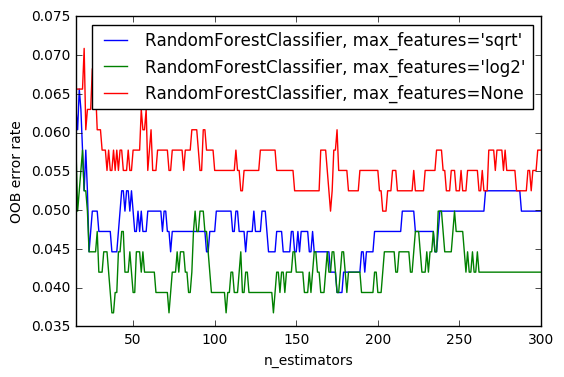

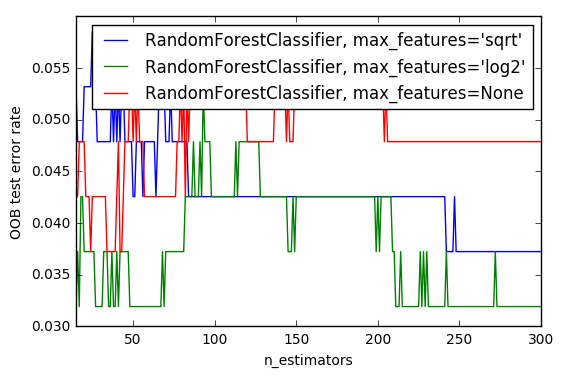

In [5]:
import sklearn.metrics as metrics
RANDOM_STATE = 121
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)
test_error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 300

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))
        
        # write test error
        test_error = 1 - metrics.accuracy_score(y_test, clf.predict(X_test))
        test_error_rate[label].append((i, test_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()


# please also show the test error
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in test_error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB test error rate")
plt.legend(loc="upper right")
plt.show()

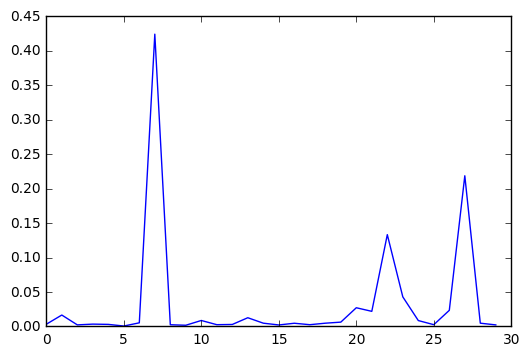

In [6]:
plot(ensemble_clfs[2][1].feature_importances_)